In [11]:
import librosa
import numpy as np
import noisereduce as nr
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
from scipy.signal import butter, lfilter

def remove_silence(y):
     # Memisahkan audio menjadi bagian-bagian berdasarkan energi
    parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

    # Menggabungkan bagian-bagian yang tidak diam
    y_non_silent = []
    for start, end in parts:
        y_non_silent.extend(y[start:end])

    # Mengubah list menjadi array numpy
    y = np.array(y_non_silent)
    return y

def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    # y = librosa.util.normalize(y)
    y = y/np.max(np.abs(y))
    y = remove_silence(y)
    y = nr.reduce_noise(y, sr, prop_decrease=0.5)
    # y = bandpass_filter(y, lowcut=100.0, highcut=3000.0, fs=sr, order=5)
    # y = shift_pitch_audio(y, sr)

    return y,sr

def extraction(audio):
    y , sr = preprocessing(audio)
    y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk = True,
                                 hop_length=512,
                                 n_fft=1024,
                                 norm='ortho',
                                 dct_type=2,
                                #  fmax=8000,
                                 n_mels=20)
    # mfccs = mfccs[1:]
    # return librosa.util.normalize(mfccs.T)
    return mfccs.T

def average_mfccs(audio_path1, audio_path2, audio_path3):
    # Ekstraksi MFCC dari kedua file audio
    mfccs1 = extraction(audio_path1)
    mfccs2 = extraction(audio_path2)
    mfccs3 = extraction(audio_path3)
    # mfccs4 = extraction(audio_path4)
    # mfccs5 = extraction(audio_path5)
    
     # Temukan dimensi terbesar di antara semua MFCC
    max_shape = max(mfccs1.shape, mfccs2.shape, mfccs3.shape)
    
    # Padding MFCC yang lebih pendek
    mfccs1 = np.pad(mfccs1, ((0, max_shape[0] - mfccs1.shape[0]), (0, max_shape[1] - mfccs1.shape[1])), mode='constant')
    mfccs2 = np.pad(mfccs2, ((0, max_shape[0] - mfccs2.shape[0]), (0, max_shape[1] - mfccs2.shape[1])), mode='constant')
    mfccs3 = np.pad(mfccs3, ((0, max_shape[0] - mfccs3.shape[0]), (0, max_shape[1] - mfccs3.shape[1])), mode='constant')
    # mfccs4 = np.pad(mfccs4, ((0, max_shape[0] - mfccs4.shape[0]), (0, max_shape[1] - mfccs4.shape[1])), mode='constant')
    # mfccs5 = np.pad(mfccs5, ((0, max_shape[0] - mfccs5.shape[0]), (0, max_shape[1] - mfccs5.shape[1])), mode='constant')

    # Hitung rata-rata MFCC satu per satu
    averaged_mfccs = (mfccs1 + mfccs2 + mfccs3) / 3
    
    return averaged_mfccs

audio_path1 = "../Dataset/01.Ha\'/Ha\'_M1_11.wav"
audio_path2 = "../Dataset/01.Ha\'/Ha\'_M1_12.wav"
audio_path3 = '../Dataset/09.Qaf/Qaf_M1_11.wav'
audio_path4 = '../Dataset/09.Qaf/Qaf_M2_11.wav'
audio_path5 = "../Dataset/01.Ha\'/Ha\'_M2_11.wav"
audio_path6 = "../Dataset/Dataset_male/Ha'_M1_1.wav"
audio_path7 = "../Dataset/Dataset_male/Ha'_M2_1.wav"


# average_mfcc = average_mfccs(audio_path1, audio_path2, audio_path5)
# print("Average MFCC shape:", average_mfcc.shape)  # Akan mencetak bentuk rata-rata MFCC

mfccs1 = extraction(audio_path1)
mfccs2 = extraction(audio_path2)
mfccs3 = extraction(audio_path3)
mfccs4 = extraction(audio_path4)
mfccs5 = extraction(audio_path5)
mfccs6 = extraction(audio_path6)
mfccs7 = extraction(audio_path7)

distance, path = fastdtw(mfccs1, mfccs2, dist=cosine)
distance1, path1 = fastdtw(mfccs1, mfccs5, dist=cosine)
distance2, path2 = fastdtw(mfccs1, mfccs3, dist=cosine)
distance3, path3 = fastdtw(mfccs1, mfccs4, dist=cosine)
distance4, path4 = fastdtw(mfccs1, mfccs6, dist=cosine)
distance5, path5 = fastdtw(mfccs1, mfccs7, dist=cosine)

print(f'Distance = {distance}')
print(f'Distance = {distance1}')
print(f'Distance = {distance2}')
print(f'Distance = {distance3}')
print(f'Distance = {distance4}')
print(f'Distance = {distance5}')

# mfccs = extraction(audio_path1)

# average_distance, _ = fastdtw(mfccs, average_mfcc, dist=cosine)

# print(f'average_Distance = {average_distance}')


Distance = 4.084047188382649
Distance = 9.393921114741174
Distance = 13.971579941674237
Distance = 15.498031054562322
Distance = 24.55003572378237
Distance = 31.091219822604394


In [12]:
mfccs2.shape

(762, 13)

In [14]:
mfccs2[0,:]

array([-2.2867244e+02,  1.7586285e+01,  8.2235518e+00, -7.5950789e-01,
       -2.7364810e+00,  2.2529781e-02,  3.3352790e+00,  3.9967532e+00,
        2.6269846e+00,  1.3912354e+00,  6.9581306e-01,  3.6940060e+00,
        6.0283642e+00], dtype=float32)

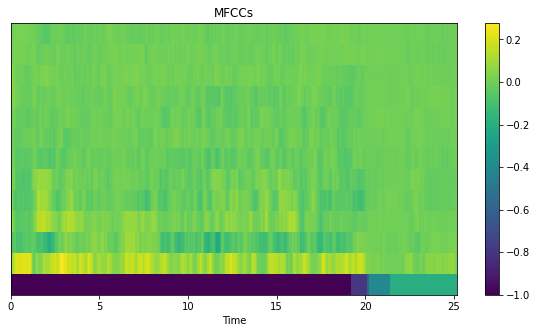

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.specshow(average_mfcc.T, x_axis="time", cmap="viridis")
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [2]:
mfccs1.shape

(870, 13)

In [45]:
max_shape = max(mfccs1.shape, mfccs2.shape, mfccs3.shape, mfccs4.shape, mfccs5.shape)

In [46]:
max_shape

(2169, 13)

In [47]:
mfccs1 = np.pad(mfccs1, ((0, max_shape[0] - mfccs1.shape[0]), (0, max_shape[1] - mfccs1.shape[1])), mode='constant')

In [3]:
mfccs1.shape

(870, 13)

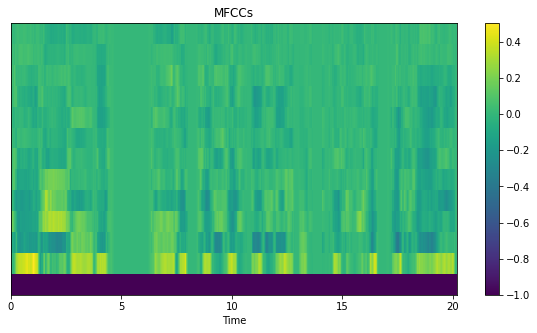

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
fig.patch.set_facecolor('white')
librosa.display.specshow(mfccs1.T, x_axis="time", cmap="viridis")
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [7]:
# pake ini

import librosa
import numpy as np
import noisereduce as nr
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
import os
import csv


def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    # y = y / np.max(np.abs(y))
    y, _ = librosa.effects.trim(y, top_db=20)
    # y = librosa.util.fix_length(y, size=600000, mode = 'constant')
    y = nr.reduce_noise(y, sr)
    return y, sr

def extraction(audio):
    y , sr = preprocessing(audio)
    y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk=False,
                                 hop_length=512,
                                 n_fft=1024,
                                 norm='ortho',
                                 dct_type=2,
                                 n_mels=20)
    mfccs = librosa.util.normalize(mfccs.T)
    # mfccs = np.mean(mfccs, axis=1)  # Menggunakan axis=1 untuk merata-ratakan per baris, sehingga hasil tetap berupa vektor satu dimensi
    # mfccs = np.expand_dims(mfccs, axis=1)
    return mfccs

def average_mfccs_from_folder(folder_path):
    # Inisialisasi list untuk menyimpan MFCC dari setiap file audio
    all_mfccs = []
    
    # Iterasi melalui setiap file dalam folder
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):  # Pastikan hanya memproses file audio
            audio_path = os.path.join(folder_path, file)
            mfccs = extraction(audio_path)
            all_mfccs.append(mfccs)
    
    # Temukan dimensi terbesar di antara semua MFCC
    max_shape = max([mfcc.shape for mfcc in all_mfccs])
    
    # Padding MFCC yang lebih pendek diisi nol hingga max
    padded_mfccs = []
    for mfcc in all_mfccs:
        padded_mfcc = np.pad(mfcc, ((0, max_shape[0] - mfcc.shape[0]), (0, max_shape[1] - mfcc.shape[1])), mode='constant')
        padded_mfccs.append(padded_mfcc)
        
    # # Menyimpan setiap padded MFCC ke dalam file CSV
    # for i, padded_mfcc in enumerate(padded_mfccs):
    #     output_path = f"padded_mfcc_{i+1}.csv"
    #     with open(output_path, 'w', newline='') as csvfile:
    #         writer = csv.writer(csvfile)
    #         writer.writerows(padded_mfcc)

    #     print(f"File CSV untuk padded MFCC {i+1} telah disimpan: {output_path}")
    
    # Hitung rata-rata MFCC satu per satu
    averaged_mfccs = np.mean(padded_mfccs, axis=0)
    print(f'total file mfcc {len(all_mfccs)}')
    print(f'total file padded {len(padded_mfccs)}')
    # print(f'padded mfcss shape {padded_mfccs.shape}')
    return averaged_mfccs

folder_path = "../Dataset/04.Dhad"
average_mfcc = average_mfccs_from_folder(folder_path)
print("Average MFCC shape:", average_mfcc.shape)

output_path = "../hasil_template_mfcc/new_template_dhad.csv"
np.savetxt(output_path, average_mfcc, delimiter=',')

template_mfcc = np.loadtxt(output_path, delimiter=',')

equal = np.allclose(average_mfcc, template_mfcc)
print(equal)

total file mfcc 12
total file padded 12
Average MFCC shape: (1423, 13)
True


In [14]:
average_mfcc

array([[-1.0000000e+00, -7.4251890e-03,  1.1935681e-02, ...,
         4.7829240e-03,  1.2297417e-03,  3.1654323e-03],
       [-1.0000000e+00, -3.9533139e-03,  4.0013276e-02, ...,
         1.4294460e-02,  8.5687321e-03,  1.2371174e-02],
       [-1.0000000e+00, -2.3633793e-03,  4.9327966e-02, ...,
         1.5192003e-02,  1.2545937e-02,  1.6020516e-02],
       ...,
       [-8.3333336e-02,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.3333336e-02,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-8.3333336e-02, -1.6259085e-04,  1.6108515e-04, ...,
         1.1532423e-04, -1.0592082e-04,  9.5863717e-05]], dtype=float32)

In [18]:
template_mfcc = np.loadtxt("../hasil_template_mfcc/template_kha.csv", delimiter=',')
print(template_mfcc.shape)

(2631, 13)


In [19]:
template_mfcc

array([[-1.00000000e+00, -7.42518902e-03,  1.19356811e-02, ...,
         4.78292396e-03,  1.22974173e-03,  3.16543225e-03],
       [-1.00000000e+00, -3.95331392e-03,  4.00132760e-02, ...,
         1.42944604e-02,  8.56873207e-03,  1.23711741e-02],
       [-1.00000000e+00, -2.36337935e-03,  4.93279658e-02, ...,
         1.51920030e-02,  1.25459367e-02,  1.60205159e-02],
       ...,
       [-8.33333358e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.33333358e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.33333358e-02, -1.62590848e-04,  1.61085147e-04, ...,
         1.15324226e-04, -1.05920823e-04,  9.58637174e-05]])

In [20]:
equal = average_mfcc == template_mfcc
print(equal)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [22]:
np.allclose(average_mfcc, template_mfcc)

True

In [67]:
audio_path1 = "../Dataset/01.Ha\'/Ha\'_M1_11.wav"
audio_path2 = "../Dataset/01.Ha\'/Ha\'_M1_12.wav"
audio_path3 = '../Dataset/09.Qaf/Qaf_M1_11.wav'
audio_path4 = '../Dataset/09.Qaf/Qaf_M2_11.wav'
audio_path5 = "../Dataset/01.Ha\'/Ha\'_M2_11.wav"

In [73]:
mfccs = extraction(audio_path1)

average_distance, _ = fastdtw(mfccs, average_mfcc, dist=cosine)

print(f'average_Distance = {average_distance}')

average_Distance = 32.09397608669025


In [26]:
# bukan ini

import librosa
import numpy as np
import noisereduce as nr
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
import os

def preprocessing(audio, max_duration):
    y , sr = librosa.load(audio, sr=44100)
    y, _ = librosa.effects.trim(y, top_db=20)

    # max_length = int (max_duration * sr)
    # y = librosa.util.fix_length(y, size=600000, mode = 'constant')
    y = nr.reduce_noise(y, sr)
    return y, sr

def extraction(audio, max_duration):
    y , sr = preprocessing(audio, max_duration)
    y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk=False,
                                 hop_length=512,
                                 n_fft=1024,
                                 norm='ortho',
                                 dct_type=2,
                                 n_mels=20)
    mfccs = librosa.util.normalize(mfccs)
    # mfccs = np.mean(mfccs, axis=1)  # Menggunakan axis=1 untuk merata-ratakan per baris, sehingga hasil tetap berupa vektor satu dimensi
    # mfccs = np.expand_dims(mfccs, axis=1)
    return mfccs.T

def average_mfccs_from_folder(folder_path, max_duration):
    # Inisialisasi list untuk menyimpan MFCC dari setiap file audio
    all_mfccs = []

    # Iterasi melalui setiap file dalam folder
    for file in os.listdir(folder_path):
        if file.endswith('.wav'):  # Pastikan hanya memproses file audio
            audio_path = os.path.join(folder_path, file)
            mfccs = extraction(audio_path, max_duration)
            all_mfccs.append(mfccs)
    
    # Temukan dimensi terbesar di antara semua MFCC
    max_shape = max([mfcc.shape for mfcc in all_mfccs])
    
    # Padding MFCC yang lebih pendek
    padded_mfccs = []
    for mfcc in all_mfccs:
        padded_mfcc = np.pad(mfcc, ((0, max_shape[0] - mfcc.shape[0]), (0, max_shape[1] - mfcc.shape[1])), mode='constant')
        padded_mfccs.append(padded_mfcc)
        
    
    # Hitung rata-rata MFCC satu per satu
    averaged_mfccs = np.mean(padded_mfccs, axis=0)
    # averaged_mfccs = np.mean(all_mfccs, axis=0)
    print(f'total file mfcc {len(all_mfccs)}')
    print(f'total file padded {len(padded_mfccs)}')
    # print(f'padded mfcss shape {padded_mfccs.shape}')
    return averaged_mfccs


def get_max_duration(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

    max_duration = 0

    for file in files:
        audio = os.path.join(folder_path, file)
        y , sr = librosa.load(audio, sr=44100)
        y, _ = librosa.effects.trim(y, top_db=20)
        duration = librosa.get_duration(y=y, sr=sr, n_fft=1024, hop_length=512)
        if (duration > max_duration):
            max_duration = duration
    print(f"length_max = {max_duration*sr}")
    return max_duration

folder_path = "../Dataset/09.Qaf"

max_duration = get_max_duration(folder_path)
print(f"max duration = {max_duration}")


average_mfcc = average_mfccs_from_folder(folder_path, max_duration)
print("Average MFCC shape:", average_mfcc.shape)

output_path = "../hasil_template_mfcc/template_qaf2.csv"
np.savetxt(output_path, average_mfcc, delimiter=',')

template_mfcc = np.loadtxt(output_path, delimiter=',')

equal = np.allclose(average_mfcc, template_mfcc)
print(equal)

length_max = 718848.0
max duration = 16.300408163265306
total file mfcc 12
total file padded 12
Average MFCC shape: (1172, 13)
True


In [15]:
# tes pake ini lebih bagus

import librosa
import numpy as np
import noisereduce as nr
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
import os
import csv
from scipy.interpolate import interp1d
from scipy.signal import butter, lfilter

def remove_silence(y):
     # Memisahkan audio menjadi bagian-bagian berdasarkan energi
    parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

    # Menggabungkan bagian-bagian yang tidak diam
    y_non_silent = []
    for start, end in parts:
        y_non_silent.extend(y[start:end])

    # Mengubah list menjadi array numpy
    y = np.array(y_non_silent)
    return y

def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    # y = librosa.util.normalize(y)
    y = y/np.max(np.abs(y))
    y = remove_silence(y)
    y = nr.reduce_noise(y, sr, prop_decrease=0.5)
    # y = bandpass_filter(y, lowcut=100.0, highcut=3000.0, fs=sr, order=5)

    return y,sr

def extraction(audio):
    y , sr = preprocessing(audio)
    y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk=True, # false = slaney, true = htk
                                 hop_length=512,
                                 n_fft=1024,
                                 norm='ortho',
                                 dct_type=2,
                                 n_mels=20)
    # return librosa.util.normalize(mfccs.T)
    return mfccs.T


def stretch_array(arr, target_length):
    # Membuat array indeks asli dan array target yang lebih panjang
    original_indices = np.linspace(0, len(arr) - 1, num=len(arr))
    target_indices = np.linspace(0, len(arr) - 1, num=target_length)
    
    # Membuat fungsi interpolasi antara indeks asli dan target
    interpolator = interp1d(original_indices, arr, kind='linear', axis=0)
    
    # Menghasilkan array yang diregangkan
    stretched_arr = interpolator(target_indices)
    return stretched_arr

def average_mfccs_from_folder(folder_path):
    # Inisialisasi list untuk menyimpan MFCC dari setiap file audio
    all_mfccs = []
    
    # Iterasi melalui setiap file dalam folder
    for i, file in enumerate(os.listdir(folder_path)):
        if file.endswith('.wav'):  # Pastikan hanya memproses file audio
            audio_path = os.path.join(folder_path, file)
            mfccs = extraction(audio_path)
            # Membuat output path tanpa ekstensi '.wav'
            file_name, _ = os.path.splitext(file)
            output_path = f"../fix_hasil_template_mfcc/mfcc_{file_name}.csv"
            with open(output_path, 'w', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerows(mfccs)
            all_mfccs.append(mfccs)
    
    # Temukan dimensi terbesar di antara semua MFCC
    max_shape = max([mfcc.shape for mfcc in all_mfccs])
    
    # Renggangkan MFCC yang lebih pendek agar mencapai dimensi maksimum
    stretched_mfccs = []
    for mfcc in all_mfccs:
        stretched_mfcc = stretch_array(mfcc, max_shape[0])
        stretched_mfccs.append(stretched_mfcc)
        
    # # Menyimpan setiap streched MFCC ke dalam file CSV
    # for i, stretched_mfcc in enumerate(stretched_mfccs):
    #     output_path = f"../new_hasil_template_mfcc/stretched_mfcc_{i+1}.csv"
    #     with open(output_path, 'w', newline='') as csvfile:
    #         writer = csv.writer(csvfile)
    #         writer.writerows(stretched_mfcc)

    #     print(f"File CSV untuk stretch MFCC {i+1} telah disimpan: {output_path}")
    
    # Hitung rata-rata MFCC satu per satu
    averaged_mfccs = np.mean(stretched_mfccs, axis=0)
    print(f'total file mfcc {len(all_mfccs)}')
    print(f'total file stretched {len(stretched_mfccs)}')
    # print(f'padded mfcss shape {padded_mfccs.shape}')
    return averaged_mfccs

folder_path = "../Dataset/10.Ha^'"
average_mfcc = average_mfccs_from_folder(folder_path)
print("Average MFCC shape:", average_mfcc.shape)

output_path = "../fix_hasil_template_mfcc/template_Ha^'.csv"
np.savetxt(output_path, average_mfcc, delimiter=',')

template_mfcc = np.loadtxt(output_path, delimiter=',')

equal = np.allclose(average_mfcc, template_mfcc)
print(equal)

total file mfcc 18
total file stretched 18
Average MFCC shape: (1371, 13)
True


In [1]:
import librosa
import numpy as np
import noisereduce as nr
from fastdtw import fastdtw
from scipy.spatial.distance import cosine
import os
import csv
from scipy.interpolate import interp1d
from scipy.signal import butter, lfilter

def remove_silence(y):
     # Memisahkan audio menjadi bagian-bagian berdasarkan energi
    parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

    # Menggabungkan bagian-bagian yang tidak diam
    y_non_silent = []
    for start, end in parts:
        y_non_silent.extend(y[start:end])

    # Mengubah list menjadi array numpy
    y = np.array(y_non_silent)
    return y

def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    y = librosa.effects.preemphasis(y, coef=0.97)
    y = y/np.max(np.abs(y))
    y = remove_silence(y)
    y = nr.reduce_noise(y, sr, prop_decrease=0.8)
    # y = bandpass_filter(y, lowcut=100.0, highcut=3000.0, fs=sr, order=5)

    return y,sr

def extraction(audio):
    y , sr = preprocessing(audio)
    # y = librosa.effects.preemphasis(y, coef=0.95)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk=True, # false = slaney, true = htk
                                 hop_length=512,
                                 n_fft=1024,
                                 norm=None,
                                 dct_type=2,
                                 n_mels=20)
    # return librosa.util.normalize(mfccs.T)
    return mfccs.T

def stretch_array(arr, target_length):
    # Membuat array indeks asli dan array target yang lebih panjang
    original_indices = np.linspace(0, len(arr) - 1, num=len(arr))
    target_indices = np.linspace(0, len(arr) - 1, num=target_length)
    
    # Membuat fungsi interpolasi antara indeks asli dan target
    interpolator = interp1d(original_indices, arr, kind='linear', axis=0)
    
    # Menghasilkan array yang diregangkan
    stretched_arr = interpolator(target_indices)
    return stretched_arr

def mfcc_to_csv(folder_path):
    all_mfccs = []
    for i, file in enumerate(os.listdir(folder_path)):
        
        audio_path = os.path.join(folder_path, file)
        mfccs = extraction(audio_path)
        # Membuat output path tanpa ekstensi '.wav'
        file_name, _ = os.path.splitext(file)
        output_path = f"../fix_hasil_template_mfcc/Dataset_Alt_mfcc_{file_name}.csv"
        with open(output_path, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(mfccs)
        all_mfccs.append(mfccs)
            

        csv_file = np.loadtxt(output_path, delimiter=',')

        equal = np.allclose(csv_file,mfccs)
        print(equal,mfccs.shape,csv_file.shape)

    # Temukan dimensi terbesar di antara semua MFCC
    max_shape = max([mfcc.shape for mfcc in all_mfccs])
    print(max_shape)
    
    # Renggangkan MFCC yang lebih pendek agar mencapai dimensi maksimum
    stretched_mfccs = []
    for mfcc in all_mfccs:
        stretched_mfcc = stretch_array(mfcc, max_shape[0])
        stretched_mfccs.append(stretched_mfcc)

    averaged_mfccs = np.mean(stretched_mfccs, axis=0)
    print(averaged_mfccs.shape)
    folder_name = folder_path.split('/')[-2] # Mendapatkan nama folder
    output_template_path = f"../fix_hasil_template_mfcc/Alt_template_mfcc_{folder_name}.csv"
    np.savetxt(output_template_path, averaged_mfccs, delimiter=',')
        


root = "../Dataset_Alt/"
list_template_folders = [
    ("01.Ha'_Alt/"),
    ("02.Kha'_Alt/"),
    ("03.Shad_Alt/"),
    ("04.Dhad_Alt/"),
    ("05.Tha'_Alt/"),
    ("06.Dhza'_Alt/"),
    ("07.'AIn_Alt/"),
    ("08.Ghain_Alt/"),
    ("09.Qaf_Alt/"),
    ("10.Ha^'_Alt/")
]
for folder in list_template_folders:
    print(f"processing {folder.split('/')}")
    folder=os.path.join(root,folder)
    mfcc_to_csv(folder)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


processing ["01.Ha'_Alt", '']
True (217, 13) (217, 13)
True (222, 13) (222, 13)
True (201, 13) (201, 13)
True (170, 13) (170, 13)
True (169, 13) (169, 13)
True (177, 13) (177, 13)
True (245, 13) (245, 13)
True (250, 13) (250, 13)
True (284, 13) (284, 13)
True (272, 13) (272, 13)
True (262, 13) (262, 13)
True (262, 13) (262, 13)
(284, 13)
(284, 13)
processing ["02.Kha'_Alt", '']
True (269, 13) (269, 13)
True (268, 13) (268, 13)
True (274, 13) (274, 13)
True (253, 13) (253, 13)
True (254, 13) (254, 13)
True (262, 13) (262, 13)
True (350, 13) (350, 13)
True (359, 13) (359, 13)
True (359, 13) (359, 13)
True (488, 13) (488, 13)
True (392, 13) (392, 13)
True (484, 13) (484, 13)
(488, 13)
(488, 13)
processing ['03.Shad_Alt', '']
True (225, 13) (225, 13)
True (232, 13) (232, 13)
True (235, 13) (235, 13)
True (198, 13) (198, 13)
True (215, 13) (215, 13)
True (205, 13) (205, 13)
True (319, 13) (319, 13)
True (307, 13) (307, 13)
True (340, 13) (340, 13)
True (333, 13) (333, 13)
True (354, 13) (35